In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('../../data.csv')

In [4]:
df.head()

,Unnamed: 0,num_of_preg,Blood Pressure,BMI,Age,class
0,0,6,72,33.6,50,1
1,1,1,66,26.6,31,0
2,2,8,64,23.3,32,1
3,3,1,66,28.1,21,0
4,4,0,40,43.1,33,1


In [5]:
source_df = pd.read_csv('../../source_data.csv',names=[
        'preg',
        'glu',
        'bp',
        'skin_fold_thickness',
        'insulin',
        'bmi',
        'diabetes_pedigree_fn',
        'age',
        'class'
    ])


In [6]:
def filter(x):
    if x == 'tested_positive': return 1
    elif x == 'tested_negative': return 0
    return x

df = source_df.applymap(filter)

In [7]:
vals = df['class'].value_counts()
print("{0}% positive and {1}% negative".format(vals[1]*100/sum(vals),vals[0]*100/sum(vals)))

34.895833333333336% positive and 65.10416666666667% negative


In [8]:
no_missing_vals = df.loc[df['bmi'] != 0]
no_missing_vals = no_missing_vals.loc[no_missing_vals['insulin'] != 0]
no_missing_vals = no_missing_vals.loc[no_missing_vals['age'] != 0]
no_missing_vals = no_missing_vals.loc[no_missing_vals['bp'] != 0]
no_missing_vals = no_missing_vals.loc[no_missing_vals['glu'] != 0]
no_missing_vals.loc[no_missing_vals['age'] == no_missing_vals['age'].min()]['class'].value_counts()

0    31
1     2
Name: class, dtype: int64

In [9]:
no_missing_vals['class'].value_counts()
vals = no_missing_vals['class'].value_counts()
print("{0}% positive and {1}% negative".format(vals[1]*100/sum(vals),vals[0]*100/sum(vals)))

33.16326530612245% positive and 66.83673469387755% negative


In [10]:
df_z = df.loc[df['class'] == 0]
df_nz = df.loc[df['class'] == 1]

In [11]:
split_z = df_z[:268]
_df = pd.concat([split_z,df_nz])

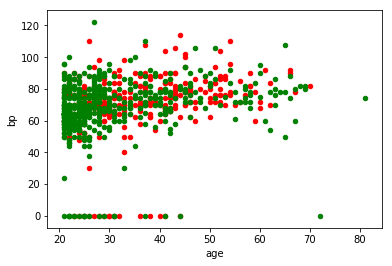

In [12]:
# df.mean()
p = df.loc[df['class'] == 1].plot.scatter(x='age',y='bp',c='red')
df.loc[df['class'] == 0].plot.scatter(x='age',y='bp',c='green',ax=p)

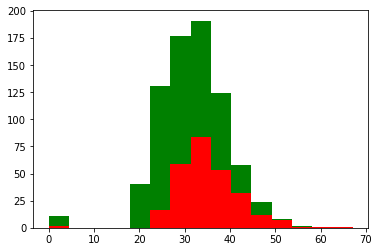

In [13]:
d = df.loc[df['class'] == 1]
nd = df.loc[df['class'] == 0]

# df['bmi'].min()
plt.hist([d['bmi'],nd['bmi']],bins=15,range=(df['bmi'].min(),df['bmi'].max()),stacked=True,color=['r','g'])
plt.show()

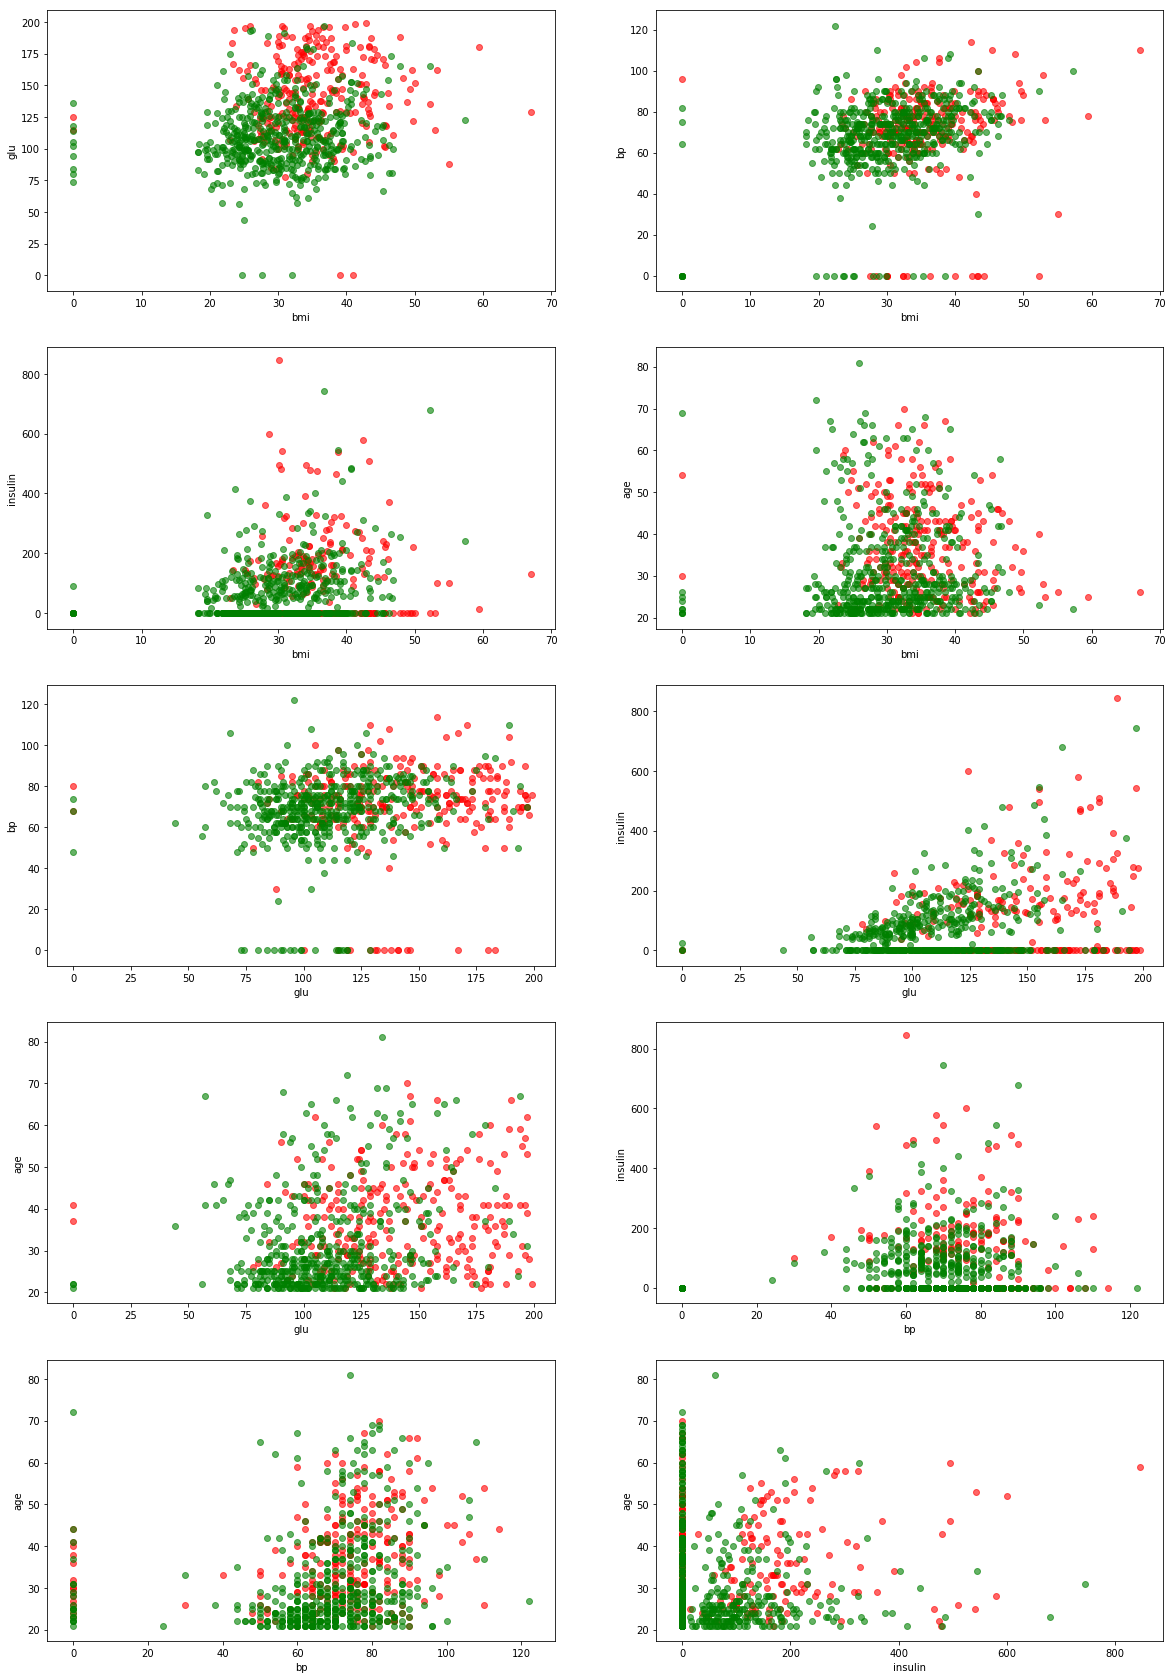

In [21]:
plt.clf()
plt.figure(figsize=(20
                    ,30))
import itertools
axes = itertools.combinations(['bmi','glu','bp','insulin','age'],2)
for i,a in enumerate(axes):
    plt.subplot(5,2,i+1)
    plt.xlabel(a[0])
    plt.ylabel(a[1])

    plt.scatter(x=df.loc[df['class'] == 1][a[0]],y=df.loc[df['class'] == 1][a[1]],c='r',alpha=0.6)
    plt.scatter(x=df.loc[df['class'] == 0][a[0]],y=df.loc[df['class'] == 0][a[1]],c='g',alpha=0.6)
plt.savefig('plot-1.png')
plt.show()